In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc 
from sklearn import metrics
from sklearn.metrics import f1_score, classification_report,precision_score,recall_score
import scikitplot as skplt
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, \
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb

In [2]:
df= pd.read_csv('Cleaned_Crashes')

### Need to trim the categories within our target dataset


In [3]:
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace(r'[^\w\s]+', '')
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':'BICYCLE ADVANCING LEGALLY ON RED LIGHT'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'BICYCLE ADVANCING LEGALLY ON RED LIGHT':'TURNING RIGHT ON RED'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'PASSING STOPPED SCHOOL BUS':'RELATED TO BUS STOP'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'RELATED TO BUS STOP':'SCHOOL BUS RELATED'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'TEXTING':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'CELL PHONE USE OTHER THAN TEXTING':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING YIELD SIGN':'DISREGARDING ROAD MARKINGS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING ROAD MARKINGS':'DISREGARDING OTHER TRAFFIC SIGNS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ANIMAL':'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'EXCEEDING SAFE SPEED FOR CONDITIONS':'EXCEEDING AUTHORIZED SPEED LIMIT'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'EXCEEDING AUTHORIZED SPEED LIMIT':'SPEEDING'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISTRACTION - FROM OUTSIDE VEHICLE':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISTRACTION - FROM INSIDE VEHICLE':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING OTHER TRAFFIC SIGNS':'DISREGARDING TRAFFIC SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING TRAFFIC SIGNALS':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING STOP SIGN':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)':'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER THE INFLUENCE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DRIVING ON WRONG SIDE/WRONG WAY':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ROAD CONSTRUCTION/MAINTENANCE':'ROAD ENGINEERING/SURFACE/MARKING DEFECTS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':'ROAD CONSTRUCTION/MAINTENANCE/DEFECTS' })
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'IMPROPER OVERTAKING/PASSING':'IMPROPER LANE USAGE' })
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'PHYSICAL CONDITION OF DRIVER':'OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER THE INFLUENCE' })
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'FOLLOWING TOO CLOSELY':'FAILING TO REDUCE SPEED TO AVOID CRASH'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'FAILING TO REDUCE SPEED TO AVOID CRASH':'FAILING TO REDUCE SPEED TO AVOID CRASH/TOO CLOSE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'IMPROPER TURNING/NO SIGNAL':'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'IMPROPER BACKING':'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'TURNING RIGHT ON RED':'FAILING TO YIELD RIGHT-OF-WAY'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'SPEEDING':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':'PHYSICAL ROAD HINDERANCES'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ROAD CONSTRUCTION/MAINTENANCE/DEFECTS':'PHYSICAL ROAD HINDERANCES'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':'PHYSICAL ROAD HINDERANCES'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'OBSTRUCTED CROSSWALKS':'PHYSICAL ROAD HINDERANCES'})
df= df[(df['PRIM_CONTRIBUTORY_CAUSE'] != "NOT APPLICABLE")]
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'OBSTRUCTED CROSSWALKS':'PHYSICAL ROAD HINDERANCES'})
df = df.drop(['Unnamed: 0','CRASH_RECORD_ID', 'CRASH_DATE_x', 'LATITUDE', 'LONGITUDE'], axis=1)

Text(0, 0.5, 'Count')

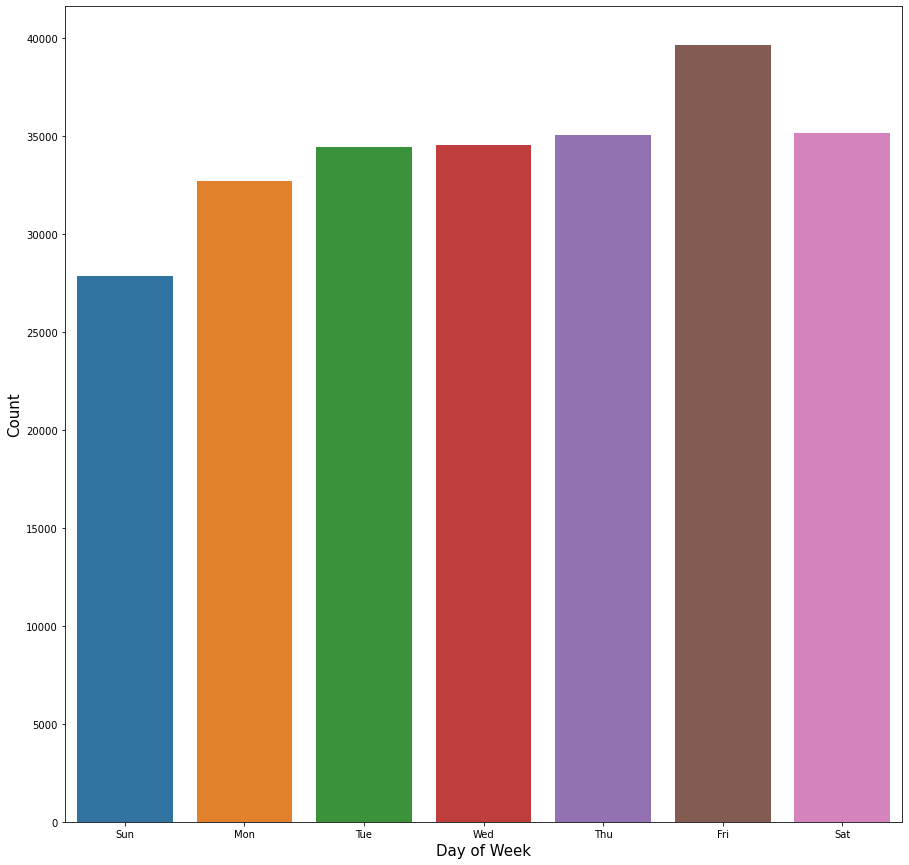

In [43]:
injury_day = df.groupby('CRASH_DAY_OF_WEEK')['INJURIES_TOTAL'].sum()
weekday_order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
plt.figure(figsize=(15, 15))
ax= sns.barplot(x=injury_day.index, y=df.groupby("CRASH_DAY_OF_WEEK")["CRASH_DAY_OF_WEEK"].count().values)

ax.set_xticklabels(weekday_order)
ax.set_xlabel("Day of Week",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

### Dummy Model 


In [72]:
X = df.drop('PRIM_CONTRIBUTORY_CAUSE',axis=1)
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [73]:
dummy = DummyClassifier()
dummy.fit(X_train,y_train)

DummyClassifier()

In [74]:
dummy.score(X_train, y_train)

0.26346028582404063

## Logistic Regression

#### Only using initial 'int64' DataTypes

In [27]:
log_int_df= df.select_dtypes('int64')
X = log_int_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [28]:
logreg =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=200)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


acc_logreg = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_logreg))

Accuracy: 0.29122824598323144 


/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Only using 'float64' DataTypes

In [29]:
log_float_df= df.select_dtypes('float64')
X = log_float_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [30]:
logreg =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=400)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


acc_logreg = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_logreg))

Accuracy: 0.26707752947857166 


/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Dummy Variables LogReg

In [80]:
columns =['TRAFFIC_CONTROL_DEVICE',
       'ROADWAY_SURFACE_COND','DEVICE_CONDITION', 'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION',]


df_new = df[columns]
new_df = df_new

# getting dummies
dummy_df=pd.get_dummies(new_df, columns= ['TRAFFIC_CONTROL_DEVICE','ROADWAY_SURFACE_COND','DEVICE_CONDITION', 'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION'], drop_first=True)

In [85]:
X = dummy_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [86]:
def multiclass_roc_auc_score(y_test, y_pred, average="micro"):
    # binarizing my features
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [87]:
logreg_dummy =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=400)

logreg_dummy.fit(X_train, y_train)
y_pred = logreg_dummy.predict(X_test)



acc_logreg = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_logreg))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5550489360991415 
AUC: 0.755276914854528


In [88]:
confusion_matrix(y_test, y_pred)

array([[ 1517,     0,   592,     0,   302,  1622,   122,    82,    18,
            0,   116],
       [   67,     4,   545,     0,   678,   154,    98,    40,    42,
            0,    35],
       [  272,     6,  4863,     0,  1308,  3456,   860,    98,   131,
            0,   200],
       [   37,     0,   375,     0,   167,    37,    43,     9,    22,
            0,    41],
       [  186,     3,  1239,     0, 12321,  1073,   535,   183,    36,
            0,   199],
       [  608,     0,  1025,     0,   380,  7492,  2232,    29,    69,
            0,    51],
       [  103,     0,  1622,     0,   375,  1236,  4814,    81,    27,
            0,    60],
       [   86,     1,   612,     0,   273,   152,   167,  1227,    21,
            0,    33],
       [   38,     1,   430,     0,   108,   395,   102,    10,   333,
            0,    89],
       [    0,     0,    10,     0,     6,     9,    15,     2,     2,
            0,     1],
       [   77,     0,   183,     0,   528,   236,    83,    

### Cross Validate with a ShuffleSplit LogReg

In [36]:
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
mean_cross_score = np.mean(cross_val_score(logreg_dummy, X, y, cv=cv))
mean_cross_score

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

0.5570154073125584

#### Concat Dummys and Int for LOG

In [94]:
concat_df = pd.concat([dummy_df,log_int_df],axis=1)

In [95]:
X = concat_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [96]:
logreg =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=400)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


acc_logreg = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_logreg))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.48020843771921035 
AUC: 0.7141146407455659


## KNN Model

In [98]:
from sklearn.neighbors import KNeighborsClassifier

#### Only using initial 'int64' DataTypes

In [99]:
KNN_int_df= df.select_dtypes('int64')
X = KNN_int_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [100]:
knn = KNeighborsClassifier(n_neighbors=1)

In [101]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [104]:
y_pred = knn.predict(X_test)
acc_knn1 = accuracy_score(pred, y_test)
print('Accuracy: {} '.format(acc_knn1))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

Accuracy: 0.19419113471623745 
AUC: 0.5568051240939306


In [103]:
cross_val_score(knn, X_train, y_train, cv=5)

array([0.19588031, 0.19541254, 0.19159893, 0.19688787, 0.19193297])

In [77]:
print(confusion_matrix(y_test,pred))

[[ 399  128  768   45 1120  847  566  278   83    4  133]
 [ 131   55  302   28  440  300  237  102   30    1   37]
 [ 766  299 2586  125 2668 2128 1499  484  275    5  359]
 [  59   19  142   14  185  138   89   47   12    0   26]
 [1109  396 2617  169 4404 3220 2325  694  329   14  498]
 [ 806  265 2161  124 3256 2483 1682  484  266    6  353]
 [ 561  210 1414  104 2324 1668 1273  330  197    4  233]
 [ 232   78  452   49  648  411  366  199   52    3   82]
 [ 115   57  269   15  399  292  204   68   31    0   56]
 [   3    1    8    0   13    7    6    6    0    0    1]
 [ 128   35  296   17  494  284  234   85   54    3  183]]


#### Chooing a K Value with Elbow Method

In [78]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

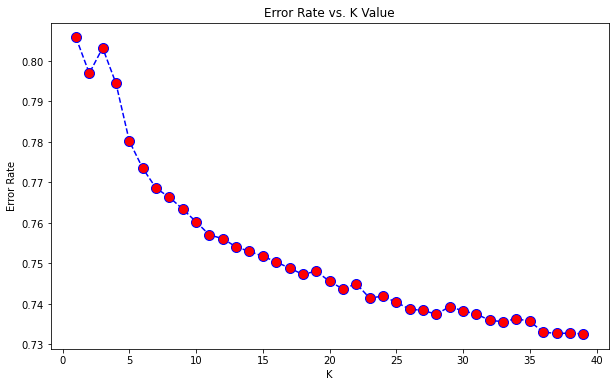

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [105]:
# NOW WITH K=40
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

acc_knn40 = accuracy_score(pred, y_test)
print('Accuracy: {} '.format(acc_knn40))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

Accuracy: 0.19419113471623745 
AUC: 0.5962955539967265


#### Only using initial 'Float' DataTypes

In [106]:
KNN_float_df= df.select_dtypes('float64')
X = KNN_float_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [107]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [108]:
y_pred = knn.predict(X_test)

In [110]:
acc_knn_float = accuracy_score(pred, y_test)
print('Accuracy: {} '.format(acc_knn_float))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

Accuracy: 0.19419113471623745 
AUC: 0.5909033971339813


#### Dummy Variables KNN

In [111]:
X = dummy_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [112]:
knn_dummy = KNeighborsClassifier(n_neighbors=40)
knn_dummy.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [113]:
y_pred = knn_dummy.predict(X_test)
acc_dummy_knn = accuracy_score(pred, y_test)
print('Accuracy: {} '.format(acc_dummy_knn))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

Accuracy: 0.19419113471623745 
AUC: 0.751630089855363


In [59]:
cross_val_score(knn, X_train, y_train, cv=5)

array([0.54719555, 0.54579111, 0.54247857, 0.53913818, 0.54336934])

#### Concat dummy and Int KNN

In [114]:
concat_df = pd.concat([dummy_df,KNN_int_df],axis=1)

In [115]:
X = concat_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [116]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc_knn=accuracy_score(pred, y_test)
print('Accuracy: {} '.format(acc_knn))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

Accuracy: 0.19419113471623745 
AUC: 0.6999682666933894


#### Decision Tree

In [117]:
columns =['TRAFFIC_CONTROL_DEVICE',
       'ROADWAY_SURFACE_COND','DEVICE_CONDITION', 'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION',]


df_new = df[columns]
new_df = df_new

# getting dummies
dummy_df=pd.get_dummies(new_df, columns= ['TRAFFIC_CONTROL_DEVICE','ROADWAY_SURFACE_COND','DEVICE_CONDITION', 'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION'], drop_first=True)

In [118]:
X = dummy_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [119]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
acc_dtree=accuracy_score(predictions, y_test)
print('Accuracy: {} '.format(acc_dtree))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, predictions)))

Accuracy: 0.550622974913986 
AUC: 0.7528426362026924


#### Decision Tree Grid Search 

In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(dtree, param_grid, cv=5)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validatio

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validatio

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validatio

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validatio

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validatio

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}

In [14]:
dtree_grid = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_split= 20)
dtree_grid.fit(X_train,y_train)
predictions = dtree_grid.predict(X_test)
acc_dtree=accuracy_score(predictions, y_test)
print('Accuracy: {} '.format(acc_dtree))

Accuracy: 0.5486354678157463 


#### Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier(max_depth=7, n_estimators=250, random_state=42)

randf.fit(X_train, y_train)
y_pred = randf.predict(X_test)


acc_rand = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_rand))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

Accuracy: 0.5082506597187427 
AUC: 0.7295378628453084


### XG Boost

In [121]:
columns =['TRAFFIC_CONTROL_DEVICE',
       'ROADWAY_SURFACE_COND','DEVICE_CONDITION', 'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION',]


df_new = df[columns]
new_df = df_new

# getting dummies
dummy_df=pd.get_dummies(new_df, columns= ['TRAFFIC_CONTROL_DEVICE','ROADWAY_SURFACE_COND','DEVICE_CONDITION', 'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION'], drop_first=True)

In [122]:
X = dummy_df
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [123]:
xgboost= xgb.XGBClassifier(objective='multi:softmax', random_state=42, max_depth=3, gamma=1)

xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

acc_xgb = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_xgb))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

/Users/avijames/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.5579884423956977 
AUC: 0.7568936433176338


In [61]:
print(confusion_matrix(y_test,y_pred))

[[ 1484     0   566     0   308  1638   142    97    18     0   118]
 [   60     0   543     0   678   154   102    55    35     0    36]
 [  235     2  4806     0  1311  3518   880   122   103     0   217]
 [   27     0   375     0   169    35    44    14    24     0    43]
 [  172     1  1215     0 12327  1075   549   210    33     0   193]
 [  535     1   944     0   372  7627  2252    35    51     0    69]
 [   99     0  1593     0   375  1186  4900    85    19     0    61]
 [   73     1   587     0   275   163   167  1253    19     0    34]
 [   29     0   424     0   111   405   107    20   319     0    91]
 [    0     0    10     0     6     8    16     2     2     0     1]
 [   63     1   164     0   531   252    67    20    22     0   693]]


### Which model performed the best on the holdout set?

In [50]:
log_reg_score =logreg_dummy.score(X_test, y_test)
knn_score =knn_dummy.score(X_test, y_test)
dt_grid_score = dtree_grid.score(X_test, y_test)
rf_score = randf.score(X_test, y_test)
xg_score = xgboost.score(X_test, y_test)


print('Logistic Regression: ', log_reg_score)
print('KNN: ', dt_grid_score)
print('Decision tree grid search: ', dt_grid_score)
print('Random Forest: ', rf_score)
print('XGBoost: ', xg_score)

Logistic Regression:  0.5550489360991415
KNN:  0.5486354678157463
Decision tree grid search:  0.5486354678157463
Random Forest:  0.5082506597187427
XGBoost:  0.5579884423956977


### SMOTE Sampling to bring up the imbalanced classes

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
X = dummy_df
y = df['PRIM_CONTRIBUTORY_CAUSE']

# performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42,stratify=y)

# standardizing the data
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# hanlding the imbalance with SMOTE
smote = SMOTE(k_neighbors=6)
X_train, y_train = smote.fit_resample(X_train, y_train)

### XGBoost

In [91]:
xgboost= xgb.XGBClassifier(objective='multi:softmax', random_state=42, max_depth=3, gamma=1)

xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

acc_xgb = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_xgb))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

/Users/avijames/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:21:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.4566255803854762 
AUC: 0.7011440692120119


In [92]:
print(confusion_matrix(y_test,y_pred))

[[ 2379     7   323   148   214   429   157   265   108     8   333]
 [   89    56    55   326   551    72    93   134   105    53   129]
 [  807    55  2072  1573  1115  2054   851  1186   425   425   631]
 [   29     5    27   275   139    19    43    39    34    35    86]
 [  404    71   443   460 10364   547   509   684   128   128  2037]
 [ 2465     8  1458   175   313  3827  2005   143   754   240   498]
 [  358    15   702   536   324   588  4565   428   152   390   260]
 [  109    13    70   143   181    86   163  1638    48    32    89]
 [   28    19    30   250    52    70    83    45   745    33   151]
 [    0     0     4     5     6     5    14     3     3     4     1]
 [   71     1    11    36    59    89    45    40    43     3  1415]]


### Logistic Regression

In [93]:
logreg_dummy =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=400)

logreg_dummy.fit(X_train, y_train)
y_pred = logreg_dummy.predict(X_test)


acc_logreg = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_logreg))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

Accuracy: 0.45226642616160606 
AUC: 0.6987465343888833
